<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EC%86%90%EA%B8%80%EC%94%A8_%EC%BC%80%EB%9D%BC%EC%8A%A4(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'len(x_train) => {len(x_train)}')  # x_train 배열의 크기를 출력
print(f'len(x_test) => {len(x_test)}')  # x_test 배열의 크기를 출력
print(f'x_train.shape => {x_train.shape}')
print(f'x_test.shape => {x_test.shape}')

2.12.0
len(x_train) => 60000
len(x_test) => 10000
x_train.shape => (60000, 28, 28)
x_test.shape => (10000, 28, 28)


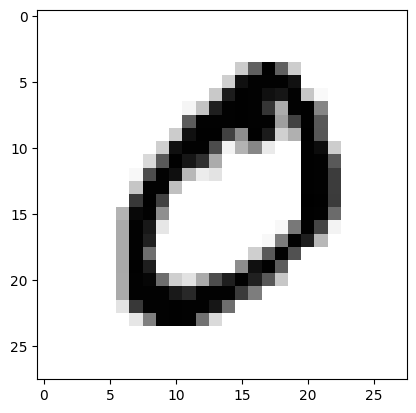

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[1])

0


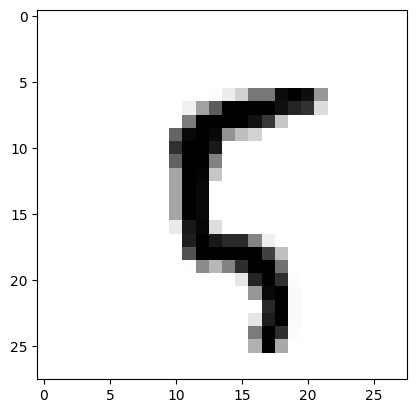

101 번째 이미지의 숫자는 바로  5 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=100
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
print(f'x_train.shape => {x_train.shape}')
print(f'x_test.shape => {x_test.shape}')

x_train.shape => (60000, 28, 28)
x_test.shape => (10000, 28, 28)


In [ ]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1932 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 37s 19m

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0309 - accuracy: 0.9911 - 2s/epoch - 7ms/step
test_loss: 0.030878430232405663
test_accuracy: 0.991100013256073


313/313 [==============================] - 2s 6ms/step
model.predict() 결과 :  [1.6117239e-11 3.5523171e-13 1.1120149e-09 3.2112529e-13 2.4067295e-12
 1.0668771e-14 3.2163801e-19 9.9999994e-01 2.2956920e-10 2.3472937e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


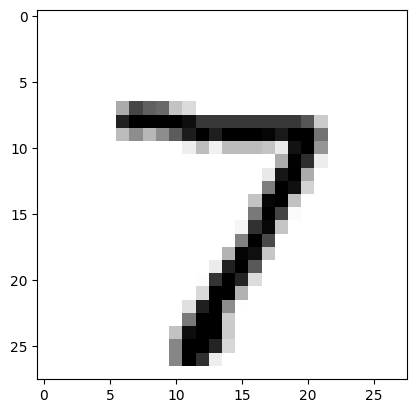

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1) # model이 추론한 숫자

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.7976315e-09 5.3068533e-07 2.8079188e-01 3.1957771e-07 5.1775757e-09
 7.0920025e-16 3.5818931e-11 7.1920705e-01 1.6915504e-07 9.8002179e-12]
라벨: 2, 예측결과: 7


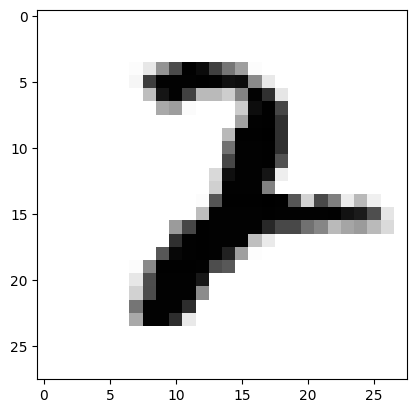

예측확률분포: [5.3118344e-14 8.2116117e-08 4.6713841e-01 5.3043878e-01 9.7486254e-18
 6.5871427e-12 9.3486840e-08 1.3932514e-07 2.4225484e-03 3.3638277e-14]
라벨: 2, 예측결과: 3


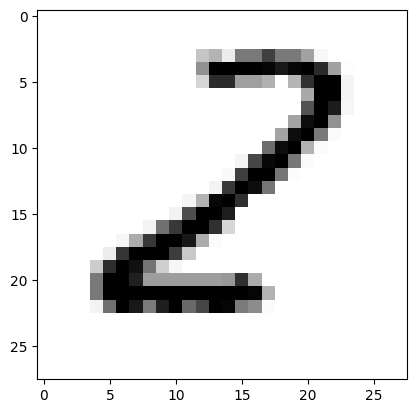

예측확률분포: [1.6223013e-03 1.6801403e-08 3.3448194e-03 1.1591477e-05 1.6261439e-09
 1.6015493e-06 8.8044561e-10 7.4610418e-01 2.3836043e-01 1.0555041e-02]
라벨: 8, 예측결과: 7


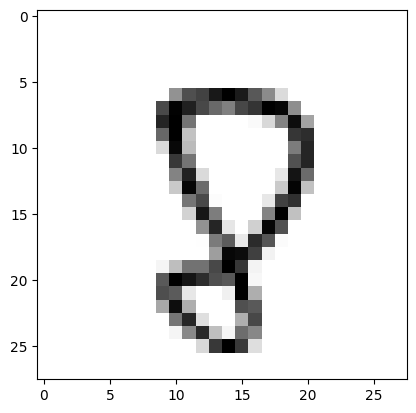

예측확률분포: [2.5827322e-02 4.4595531e-01 1.8261790e-03 5.0236349e-06 8.3480641e-05
 1.5890972e-10 4.9110860e-01 6.4249871e-05 3.5129692e-02 1.6489011e-07]
라벨: 0, 예측결과: 6


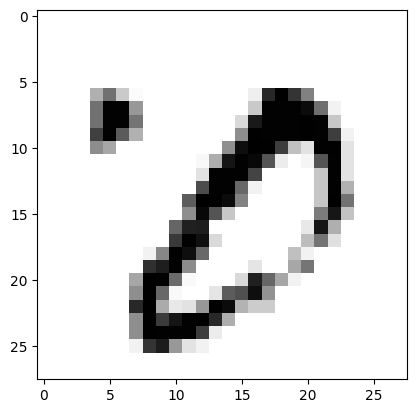

예측확률분포: [8.4478637e-09 2.4042865e-09 5.4917251e-08 2.6029792e-08 4.2726548e-08
 5.8537871e-01 2.1477691e-09 5.1512976e-05 5.5798602e-05 4.1451377e-01]
라벨: 9, 예측결과: 5


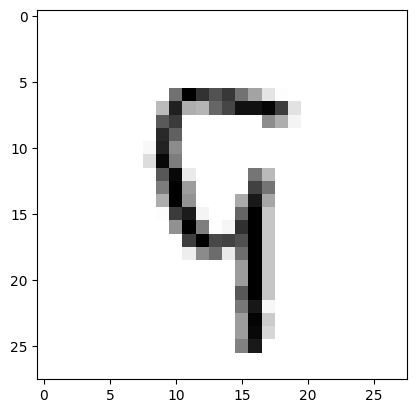

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

# n_channel_1=32
# n_channel_2=64
# n_dense=32
# n_train_epoch=5
# =================================================================
# Total params: 70,378
# Trainable params: 70,378
# Non-trainable params: 0
# _________________________________________________________________
# Epoch 1/5
# 1875/1875 [==============================] - 56s 29ms/step - loss: 0.1533 - accuracy: 0.9524
# Epoch 2/5
# 1875/1875 [==============================] - 56s 30ms/step - loss: 0.0526 - accuracy: 0.9838
# Epoch 3/5
# 1875/1875 [==============================] - 58s 31ms/step - loss: 0.0372 - accuracy: 0.9884
# Epoch 4/5
# 1875/1875 [==============================] - 54s 29ms/step - loss: 0.0292 - accuracy: 0.9907
# Epoch 5/5
# 1875/1875 [==============================] - 54s 29ms/step - loss: 0.0234 - accuracy: 0.9926
# 313/313 - 3s - loss: 0.0287 - accuracy: 0.9909 - 3s/epoch - 11ms/step
# test_loss: 0.02871905267238617
# test_accuracy: 0.9908999800682068

# n_channel_1=32
# n_channel_2=64
# n_dense=32
# n_train_epoch=5
# =================================================================
# Total params: 121,930
# Trainable params: 121,930
# Non-trainable params: 0
# _________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               